<a href="https://colab.research.google.com/github/knowl01/Predicting-Potential-Customers/blob/main/Knowledge_Gule_Potential_Customers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* **ID:** ID of the lead
* **age:** Age of the lead
* **current_occupation:** Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* **first_interaction:** How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* **profile_completed:** What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits:** How many times has a lead visited the website
* **time_spent_on_website:** Total time spent on the website
* **page_views_per_visit:** Average number of pages on the website viewed during the visits.
* **last_activity:** Last interaction between the lead and ExtraaLearn.
    * **Email Activity:** Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * **Phone Activity:** Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * **Website Activity:** Interacted on live chat with representative, Updated profile on website, etc

* **print_media_type1:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* **print_media_type2:** Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* **digital_media:** Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* **educational_channels:** Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral:** Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status:** Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [ ]:
learn = pd.read_csv("/content/drive/MyDrive/Python Course/ExtraaLearn.csv") ##  Complete the code to read the data

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

In [ ]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
data.shape

(4612, 15)

**Observations:**
*  There are **4612 rows and 15 columns**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**
*  There are no missing values in all columns.
*  There are 10 object type columns; **ID, current_occupation, first_interaction, profile_completed, last_activity, print_media_type1, print_media_type2, digital_media, educational_channels, referral**
*  There are 4 integer type columns; **age, website_visits, time_spent_on_website,status**
*  There is one float object type; **page_views_per_visit**
*   The target variable is the **status**.

In [ ]:
data.duplicated().sum()

0

**Observations:**
* There are no duplicates.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


**Observations:**
*  The minimum for **website_visits, time_spent_on_website, page_views_per_visit is 0**.
*  **website_visits, page_views_per_visit are left-skewed**.
*  The **age** ranges between **18 and 63** with the median at **51** so that may be indicating that older people are more interested in this.
*  The **page_views_per_visit** is from **0 to 18** with the **mean** being **3** it might be interesting to see how to make people view more pages, and for those with a higher number that they are potential paid leads. There may be outliers as well.
*  The **time_spent_on_website** ranges from **0 to 2537** with the mean at 724 and median at 376, these may be potential paid leads.
*  The **website_visits** ranges from **0 to 30** seems like there may be outliers. For those who are visiting the website more, this may be a sign that they are interested, we may want to see how much time they are spending in it, this.

In [ ]:
data[data['page_views_per_visit']==0]

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,EXT034,56,Professional,Mobile App,Medium,0,0,0.00000,Phone Activity,No,No,No,No,No,0
37,EXT038,59,Professional,Website,High,0,0,0.00000,Email Activity,No,No,No,No,No,1
54,EXT055,28,Professional,Mobile App,High,0,0,0.00000,Email Activity,No,No,No,Yes,No,0
94,EXT095,49,Unemployed,Website,High,0,0,0.00000,Email Activity,Yes,No,No,No,No,1
127,EXT128,54,Professional,Mobile App,High,0,0,0.00000,Phone Activity,No,No,No,No,No,0
163,EXT164,56,Unemployed,Mobile App,Medium,0,0,0.00000,Email Activity,No,No,No,No,No,0
170,EXT171,34,Professional,Website,Medium,0,0,0.00000,Email Activity,No,Yes,No,Yes,No,0
181,EXT182,55,Unemployed,Mobile App,High,0,0,0.00000,Email Activity,Yes,No,No,No,No,0
193,EXT194,41,Professional,Mobile App,Low,0,0,0.00000,Phone Activity,Yes,Yes,No,Yes,No,0
213,EXT214,32,Unemployed,Mobile App,High,0,0,0.00000,Email Activity,Yes,No,No,No,No,0


**Observations:**

*  It appears that most with minimun of **0 at website_visits, time_spent_on_website, page_views_per_visit** are more common except for a few, they only used **email activity or phone activity**.
*  Some people have zero in **website_visits, time_spent_on_website, page_views_per_visit** but they are turned into potential leads.
* There are leads who have several **website_visits**, significant **time_spent_on_website** on the website but has not been turned into leads. Might be good to reach out to them and also they might need clarification on some things since it shows that some of them have **zero** , **page_views_per_visit**. This may also mean that all the information they need is contained in that email, no external link to click.
*  Among these, **on average** those with the most **website_vists** have the most **time_spent_on_website**, and mostly professionals seem to be more interested, which is probably why the median **age** is **51** because they are the working class looking to upskill.

In [ ]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

**Observation:**
*  The **column ID** is an identifier so we can drop it since it will not help us with our analysis.
*  The different ages are **46** which shows how broad this is.
* The highest number of different values are **page_views_per_visit, time_spent_on_website, website_visits**, which are the most important and related compared to other features.
*  All columns seems to be correctly classified, just as expected with the unique values count.

In [ ]:
data.drop(columns='ID',inplace=True)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
cat_col = list(data.select_dtypes("object").columns)
cat_col

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: current_occupation, dtype: float64
--------------------------------------------------
Website      0.55117
Mobile App   0.44883
Name: first_interaction, dtype: float64
--------------------------------------------------
High     0.49089
Medium   0.48591
Low      0.02320
Name: profile_completed, dtype: float64
--------------------------------------------------
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: last_activity, dtype: float64
--------------------------------------------------
No    0.89224
Yes   0.10776
Name: print_media_type1, dtype: float64
--------------------------------------------------
No    0.94948
Yes   0.05052
Name: print_media_type2, dtype: float64
--------------------------------------------------
No    0.88573
Yes   0.11427
Name: digital_media, dtype: float64
--------------------------------------------------
No    0.84714
Yes   0.15286
Name: education

**Observations:**
*  About **(~49%)** of the people use **email activity**, this may be because it is easily accessible, people check their emails more often, followed by **phone activity, Website activity**.
*  Seems like more **professionals (~57%)** are more interested in this
*  About **(~89%)** of people have not seen the advert on **newspaper**, **(~95%)** have not seen it in **magazines**, and **(~89%)** have not seen it any **digital platform** and **(~85%)** have not heard or seen it in **digital platforms** which means that more advertising needs to be done.
*  This may explain why we have less students, this is because students use digital platforms, so for **print_media_type1** and **print_media_type2** those with **yes** may be the **profesionals** who are older, and for the **yes** in **digital_media, educational_channels** is for the students mostly, the **unemployed** may be in between these.
*   About **(~98%)** of the people have not been referred, this is because this may be  caused by the fact that it has not been advertised much, so less people know about it.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

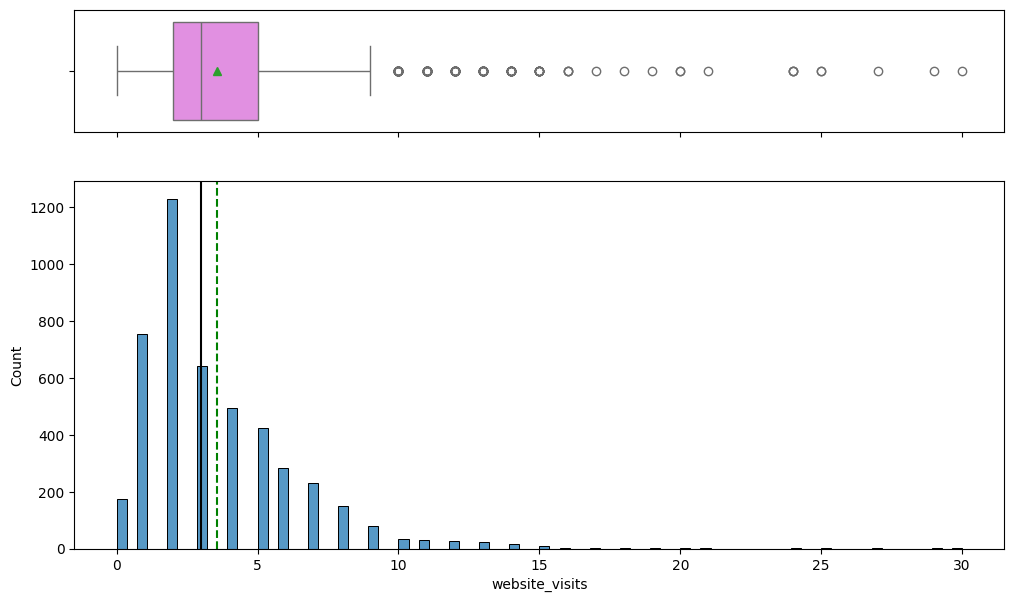

In [ ]:
histogram_boxplot(data, 'website_visits')

**Observations:**

*  The are **outliers** on one side of the boxplot, the graph is **right-skewed.**
*  Most common website visit is 3.
*  The number of website_visits decreases with increasing number of leads, this may be because they got what they were looking for.
*  Approximately more than 100 people who did not visit the website at all.
*  The mean and median are close to each other.

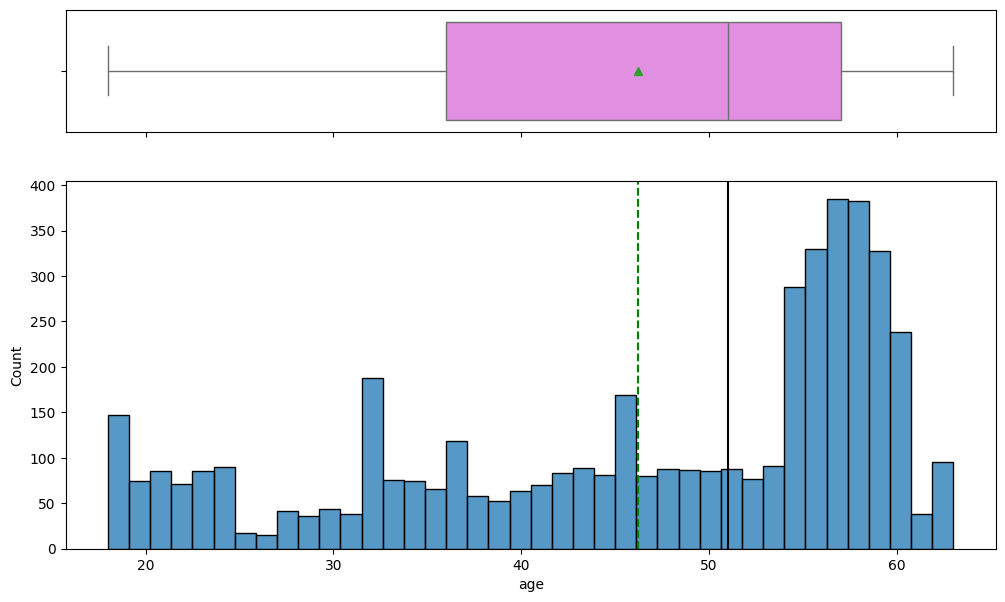

In [ ]:
histogram_boxplot(data, 'age', bins=40)

**Observations:**
*  Leads ranging from **52 to 63** years of age are more than 800, the older they get, the interested they are in upskilling/reskilling, the other ages not as much.
*  No outliers, the boxplotted is shitfed to the right because older people .
* The mean and median are not to far apart.


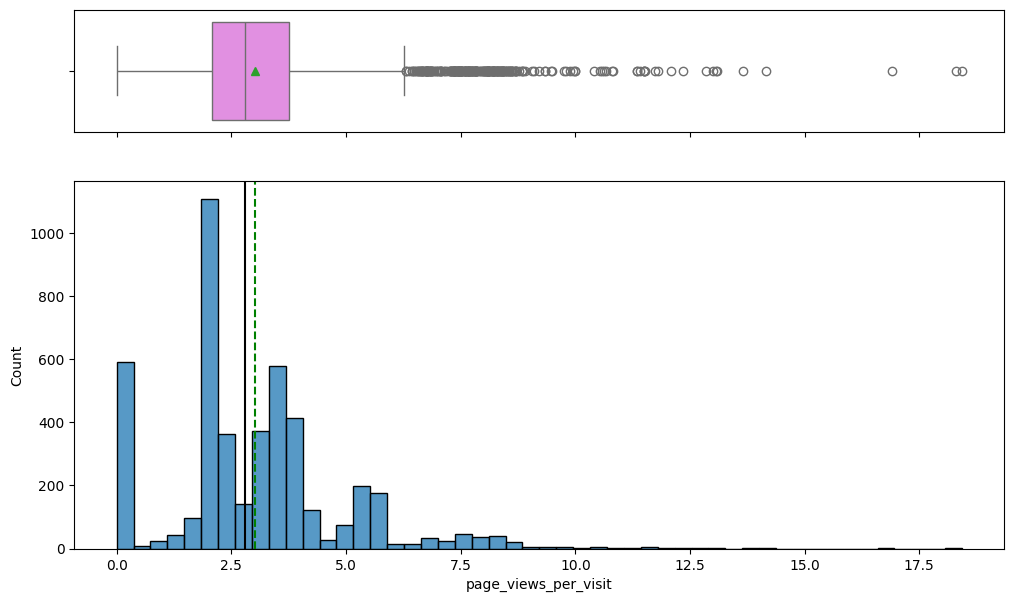

In [ ]:
histogram_boxplot(data, 'page_views_per_visit', bins=50)

**Observations:**
*  The most common page_views_per_visit is **2 pages ,followed by 4 pages and lastly 0**.
*  The number of people viewing more pages per visit get less after 6 pages
*  The mean and mode are very close.
*  There are outliers on one side of the graphs, hence it is left-skewed.

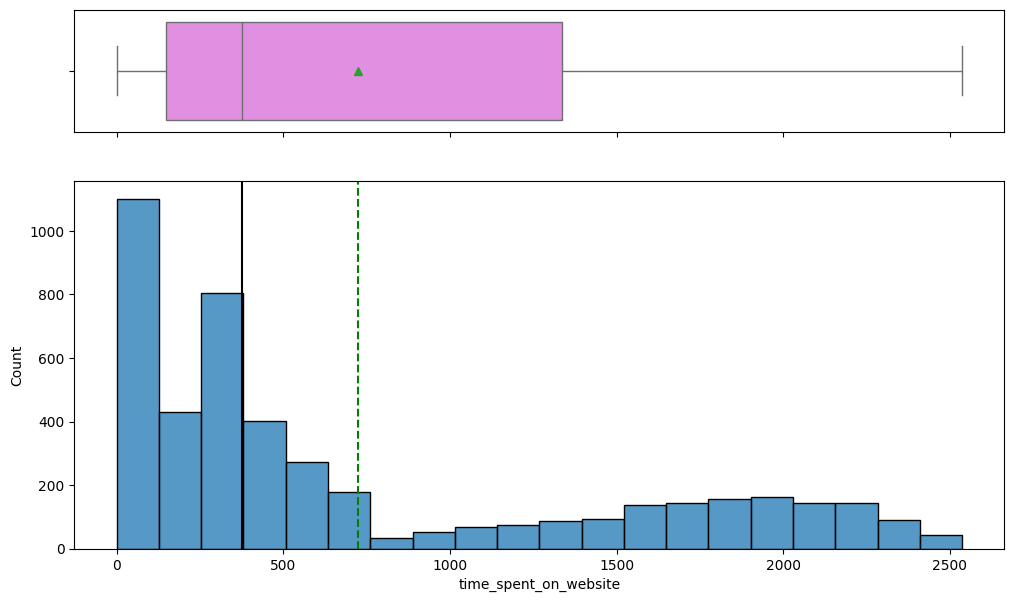

In [ ]:
histogram_boxplot(data, 'time_spent_on_website', bins=20)

**Observations:**
*  The number of people wh spend **time_spent_on_website** starts to get less after 500 minutes.
* The most common time spent is **0 and 400**.
* The graph does not have outliers.

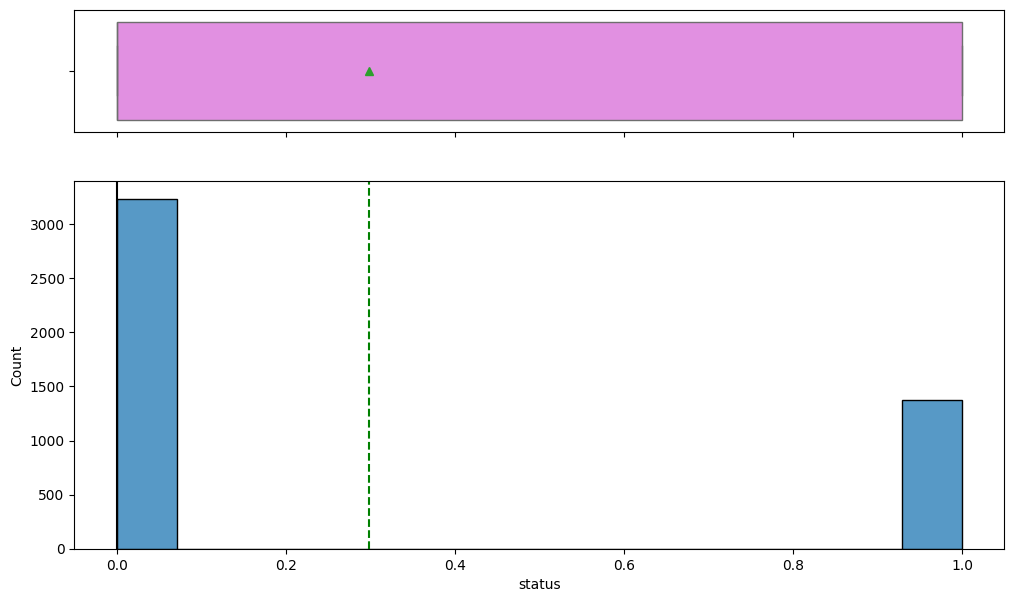

In [ ]:
histogram_boxplot(data, 'status')

**Observations:**
*  The number of people who have not converted to potential customers is more than the number of people who have converted to customers.

<Axes: >

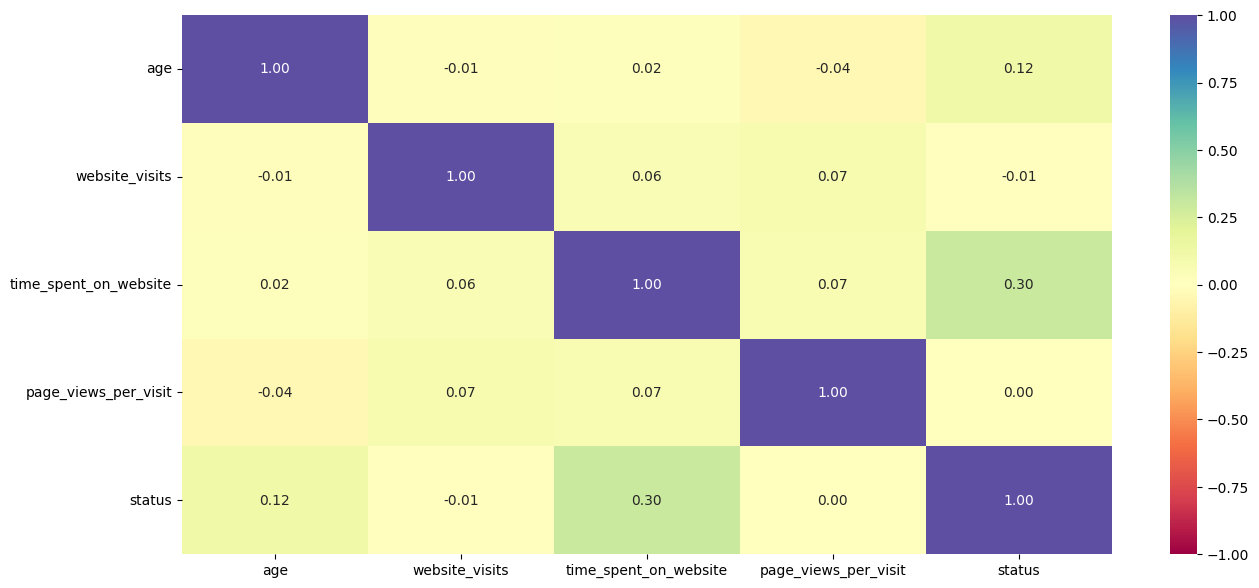

In [ ]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:**
*  The **time_spent_on_website** and **status** are positively correlated. That is because you spend more time on something because you are interested.
*  The **age and status** as we have seen the older the get, the more intested. this may be due to the fact that older people retire so they are looking for ways to upskill themselves.
* No correlation between variables except for the ones above.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

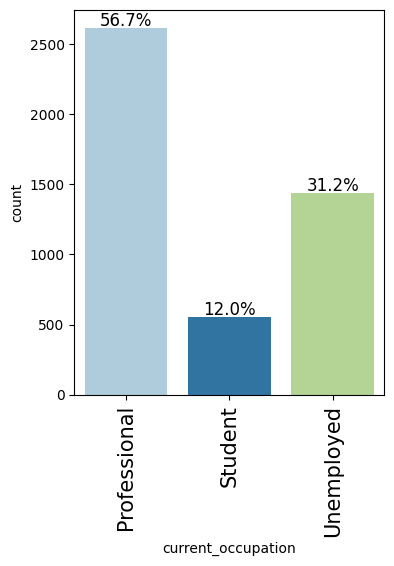

In [ ]:
labeled_barplot(data, "current_occupation", perc=True)

**Observations:**
* There are more professionals with 56.7% followed by unemployed at 31.2% and student at 12%.

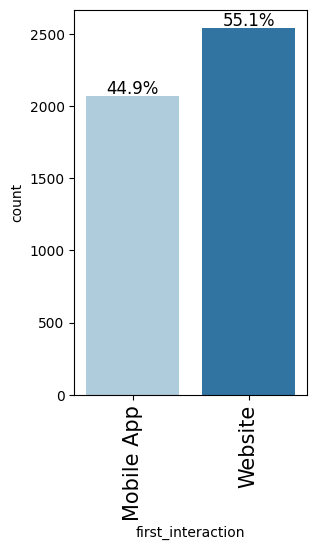

In [ ]:
labeled_barplot(data, "first_interaction", perc=True)

**Observations:**
* Most leads use the website who are 55.1% and Mobile App at 44.9%.

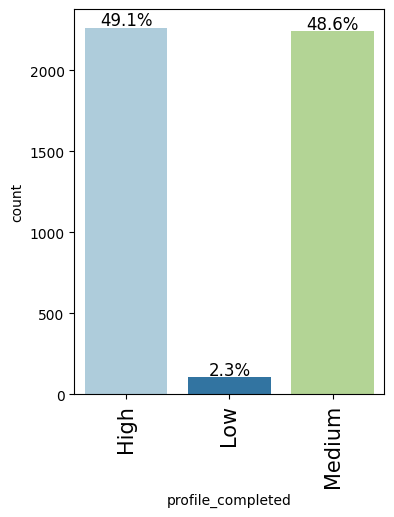

In [ ]:
labeled_barplot(data, "profile_completed", perc=True)

**Observations:**
*  About 49.1% of leads have completed their profiles followed by Medium at 48.6% then Low at 2.3%.

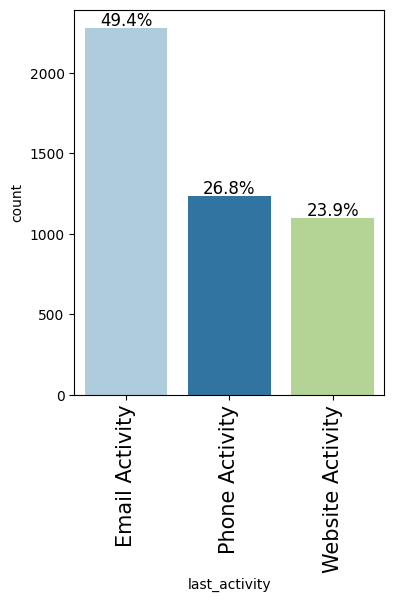

In [ ]:
labeled_barplot(data, "last_activity", perc=True)

**Observations:**
* About 49.4% of the leads use email activity, followed by phone activity then website activity as their last activity.

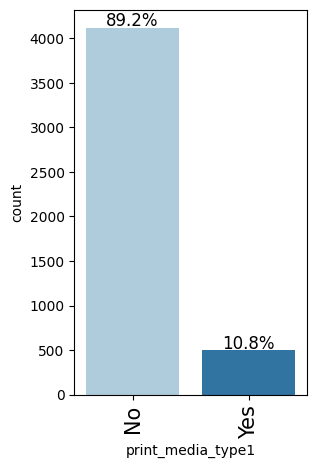

In [ ]:
labeled_barplot(data, "print_media_type1", perc=True)

**Observations:**
* Most of the leads have not seen the advert on Newspaper, which are about 89.2%, and those who have are at 10.8%.

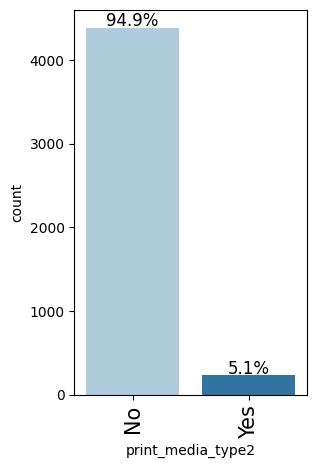

In [ ]:
labeled_barplot(data, "print_media_type2", perc=True)

**Observations:**
* Most of the leads have not seen the advert on Magazine, which are about 94.9%, and those who have are at 5.1%.

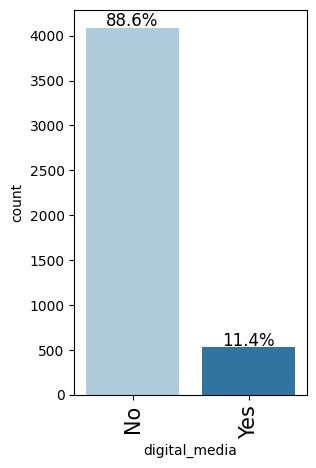

In [ ]:
labeled_barplot(data, "digital_media", perc=True)

**Observations:**
* Most of the leads have not seen the advert on digital media, which are about 88.6%, and those who have are at 11.4%.

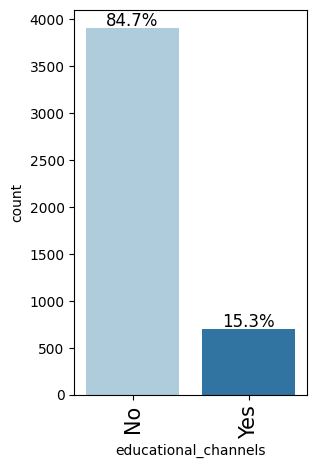

In [ ]:
labeled_barplot(data, "educational_channels", perc=True)

**Observations:**
* Most of the leads have not seen the advert on educational channels, which are about 84.7%, and those who have are at 15.3%.

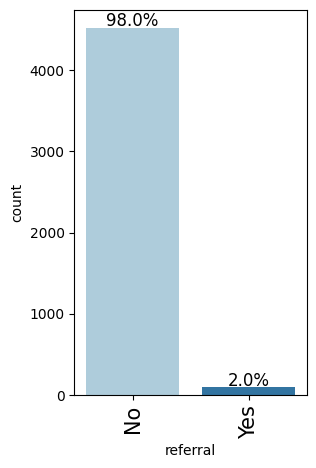

In [ ]:
labeled_barplot(data, "referral", perc=True)

**Observations:**
* Most of the leads have not been referred, which are about 98.0%, and those who have are at 2.0%.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


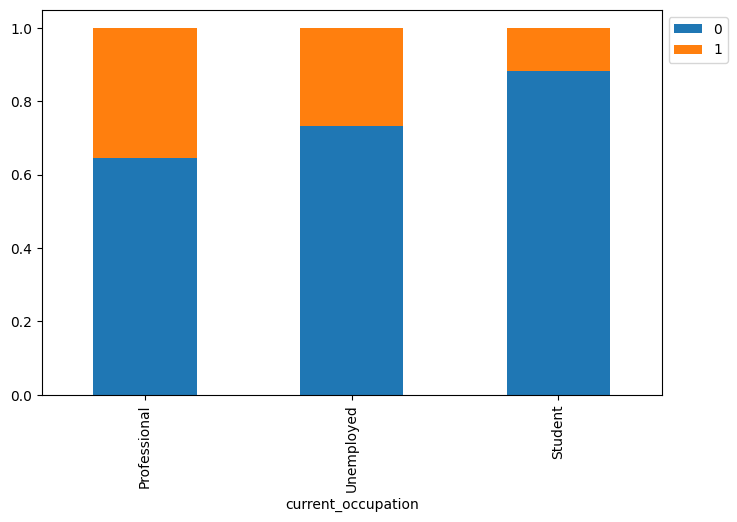

In [ ]:
stacked_barplot(data, "current_occupation", "status")

**Observations:**
*  Occupation plays a huge role in status, most **professionals** are more likely to convert, this may be because they are working so a lot keeps changing in the workplace so you need to keep up with the new developments.
*  **Professionals followed by Unemployed** are most likely to be turned to paid leads, this is because they are looking for jobs so this skills will help them in finding one.
* A fewer number of **students** are likely to be converted, it may be that they cannot afford it since they are still paying tuition or that they are still getting to know about their careers at school.
* All in all occupation influences the status of people.

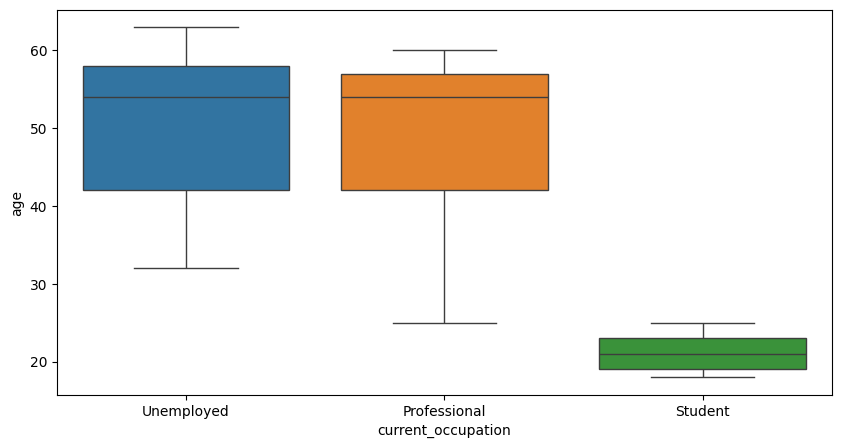

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"], hue='current_occupation')
plt.show()

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**Observations:**

*  The **age** of **students** has mean 21 years which is lower than the **professional at mean 49 years  and unemployed at mean 50 years** which are both almost equal.
*  The distribution of the **unemployed and professional** is almost equal. **Unemployed** are slightly higher than **professionals**, this means these are adults who have retired.
* The distribution for Unemployed is slightly higher and broader than Professionals, and for Students is even smaller.
* **Students** range between **18-25 years**, **Professional**s ramge from **25-60 years** and **Unemployed** between **32-63 years** old.

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


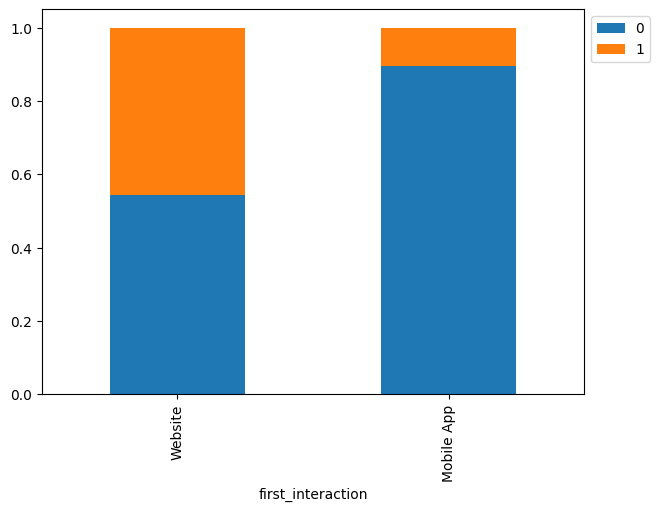

In [ ]:
stacked_barplot(data, "first_interaction", "status")

**Observations:**
*  Those whose **first_interaction** was the website are more likely to  convert to paid leads than those whose first interaction was the Mobile App.  First interaction have an impact on the lead status.
*  May want to look at the mobile app, for instance is it easy to use, is it fast, how is it different from the website, or maybe they do not know how to use the Mobile App, so what can be done to resolve that.

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


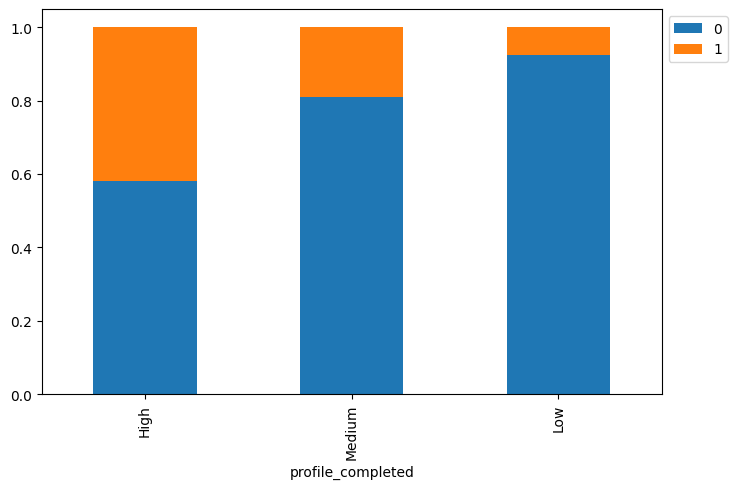

In [ ]:
stacked_barplot(data, "profile_completed", "status")

**Observations:**
*  Those with profile completed as **High** are more likely to converted to paid leads, followed by **Medium** then we have less converted leads with **Low**. This shows that the more details we have about a lead, plays a huge role in converting them to paid leads.
*  If you have not completed your profile then you are less likely to convert.

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


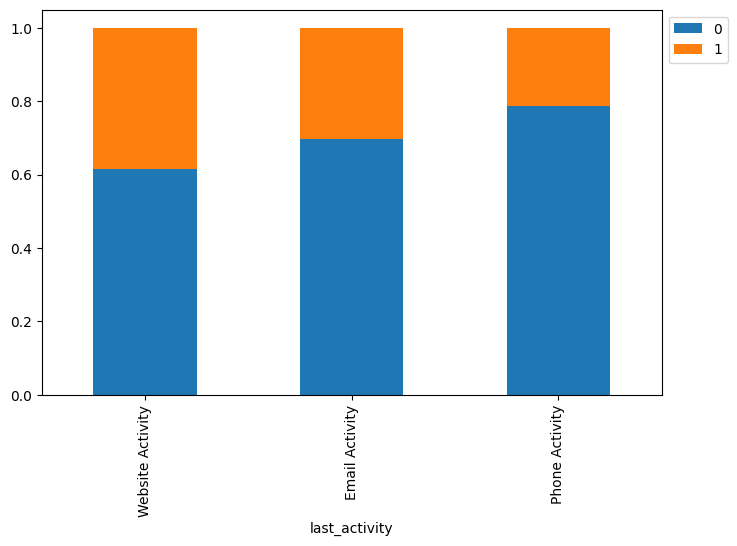

In [ ]:
stacked_barplot(data, "last_activity", "status")

**Observations:**
*  The leads who mostly converted with **last_activity** are those using **Website Activity** followed by **Email Activity** then **Phone Activity**.
*  It might be good to train the staff to be more convincing with the Phone calls so that more leads can be converted.

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


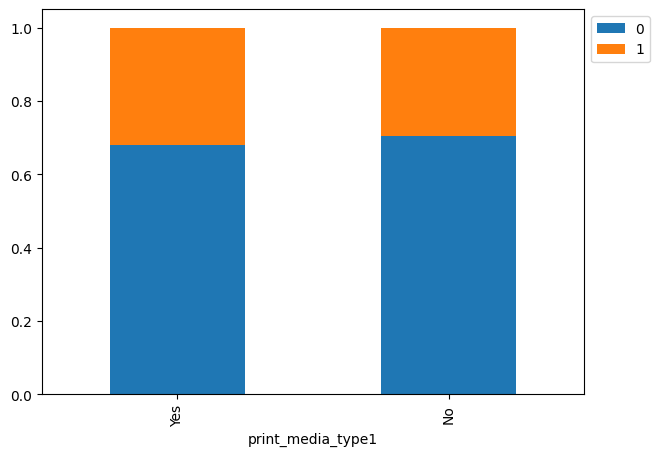

In [ ]:
stacked_barplot(data, "print_media_type1", "status")

**Observations:**
* The leads who have seen the advertisment on the Newspaper, are slightly more likely to convert, but the difference is not that much compared to those who have not seen it.


status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


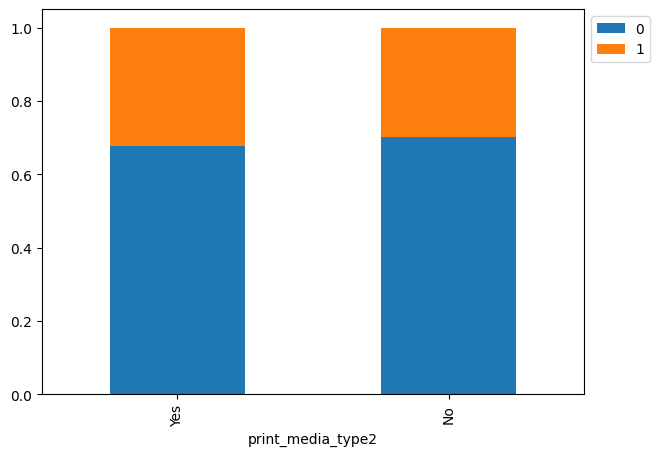

In [ ]:
stacked_barplot(data, "print_media_type2", "status")

**Observations:**

* The leads who have seen the advertisment on the Magazine, are slightly more likely to convert, but the difference is not that much compared to those who have not seen it.


status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


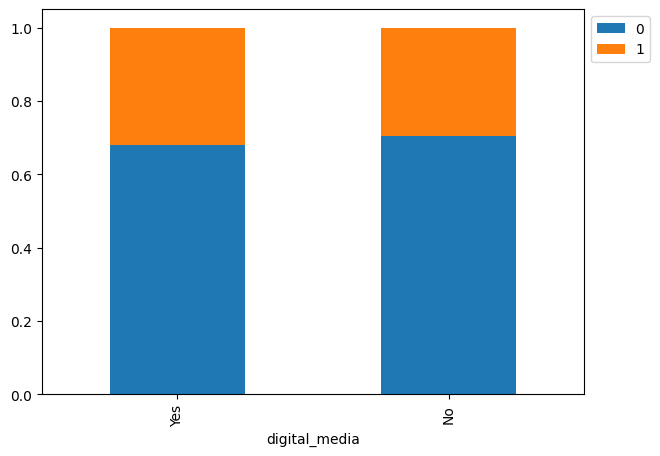

In [ ]:
stacked_barplot(data, "digital_media", "status")

**Observations:**
* The leads who have seen the advertisment on digital media, are slightly more likely to convert, but the difference is not that much compared to those who have not seen it.


status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


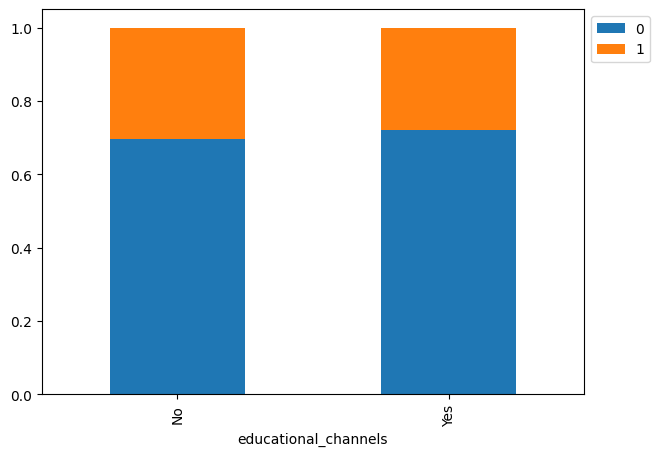

In [ ]:
stacked_barplot(data, "educational_channels", "status")

**Observations:**
* The leads who have seen the advertisment on educational channels, are slightly more likely to convert, but the difference is not that much compared to those who have not seen it.

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


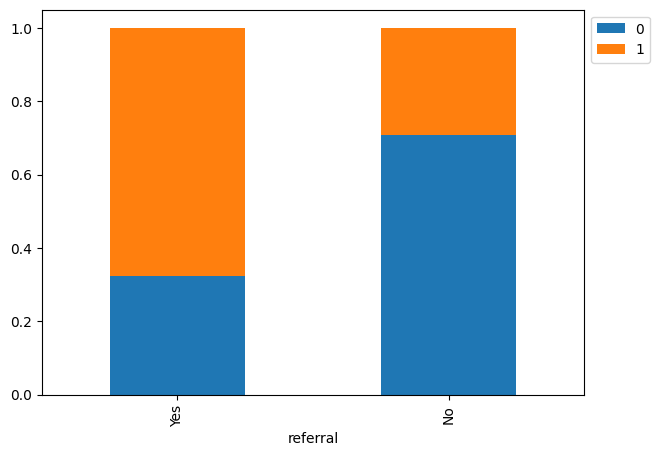

In [ ]:
stacked_barplot(data, "referral", "status")

**Observations:**
*  The leads that are referred are more likely to convert to potential customers compared to those that were not reffered.
* The leads that have been reffered have the highest conversion rate compared to **print_media_type1, print_media_type2, digital_media, educational_channels.**

In [ ]:
data.head(5)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


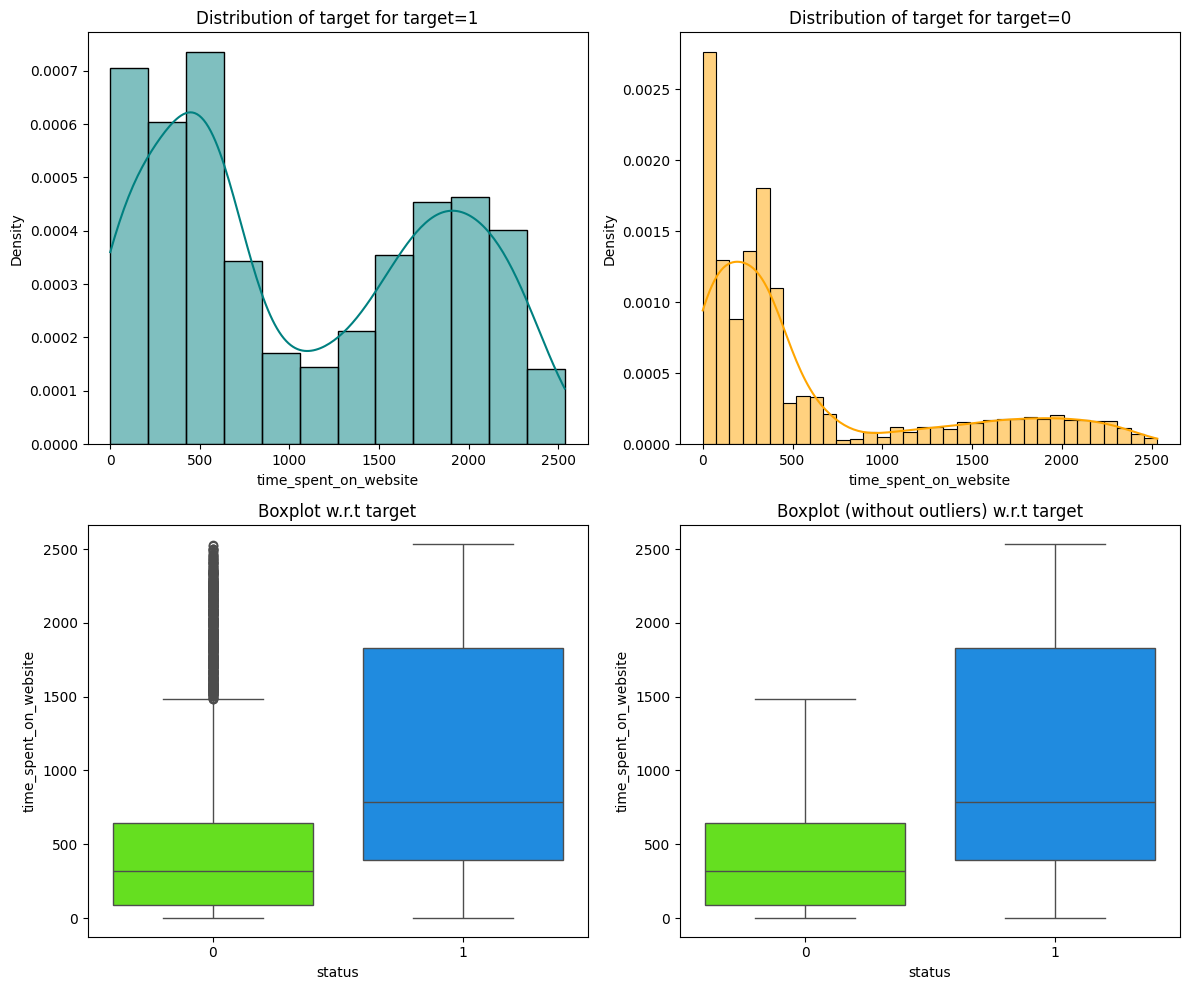

In [ ]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

**Observations:**
*  The **time_spent_on_website** distribution with **target=1** is bimodal, with mode around 500 and 2000, and the distribution with **target=0** has most leads at zero and other leads spending more than 500.

***time_spent_on_website** has many outliers on top the boxplot.
*  Perhaps you could track on the leads that are spending most of the time on the website and reach out to them.
*  The median time for status=1 is higher than status=0.

In [ ]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

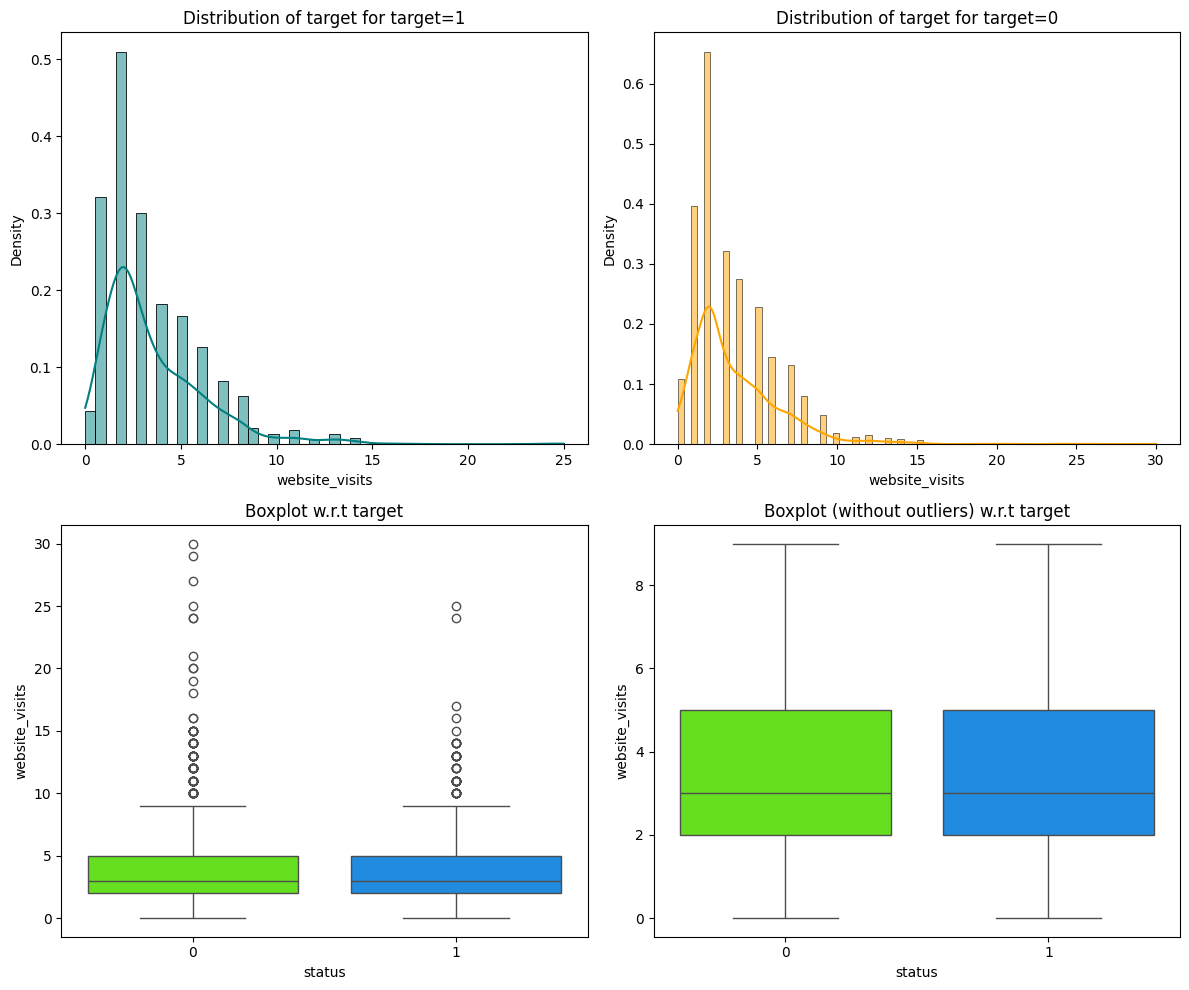

In [ ]:
distribution_plot_wrt_target(data, "website_visits", "status")

**Observations:**
*  Both target=1 and target=0 have the most common website_visits at 2 and right-skewed.
* Both have outliers on the upper side of the boxplot, with target=0 having a higher maximum outliers.
* Both targets have the same median.

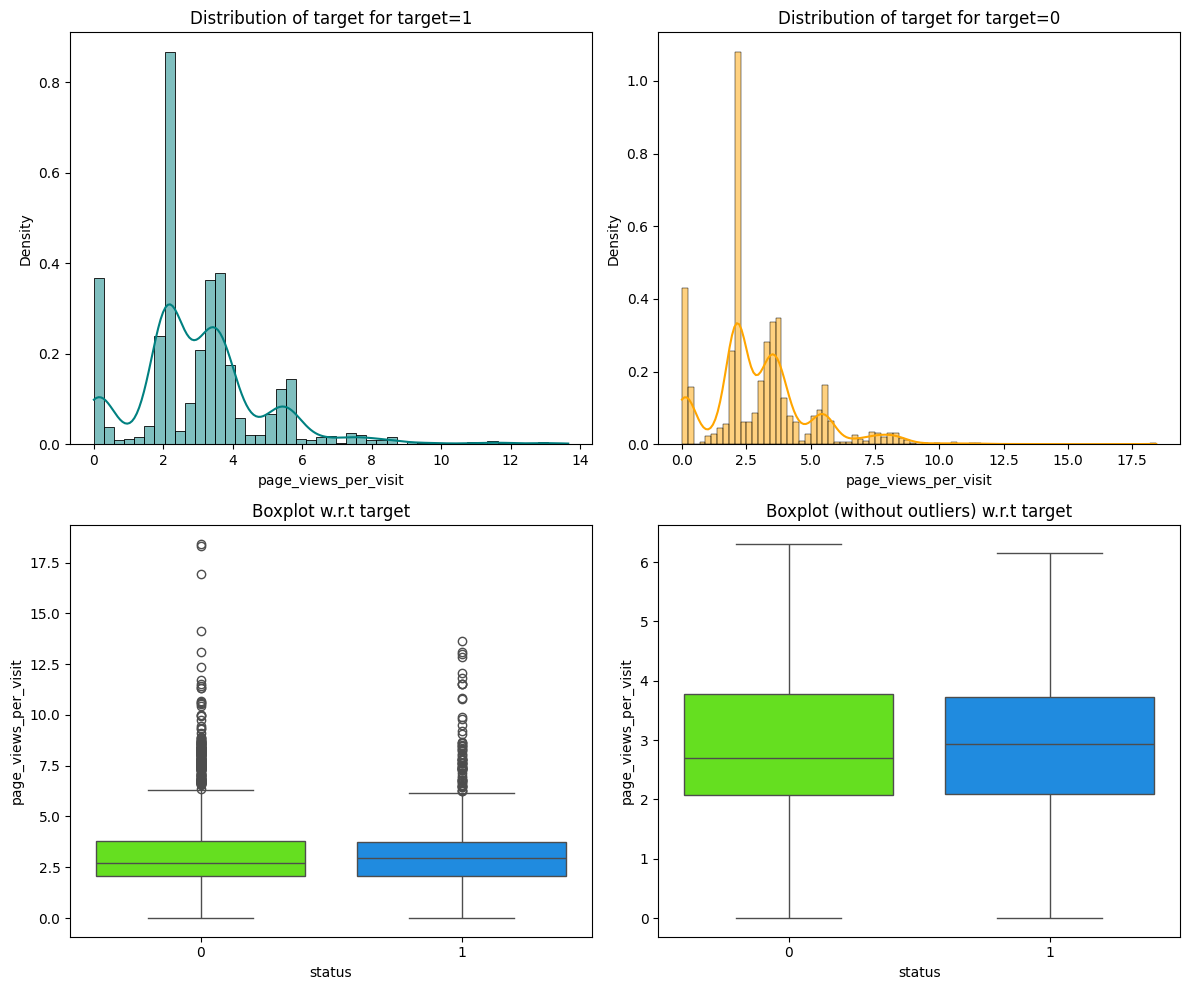

In [ ]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

**Observations:**
*  Both distributions are multi-modal, with the highest mode at 2 pages for both targets.
* status with target=0 has the highest outlier compared to target=1.
* The mean value of target=1 is slightly higher than target=0.  

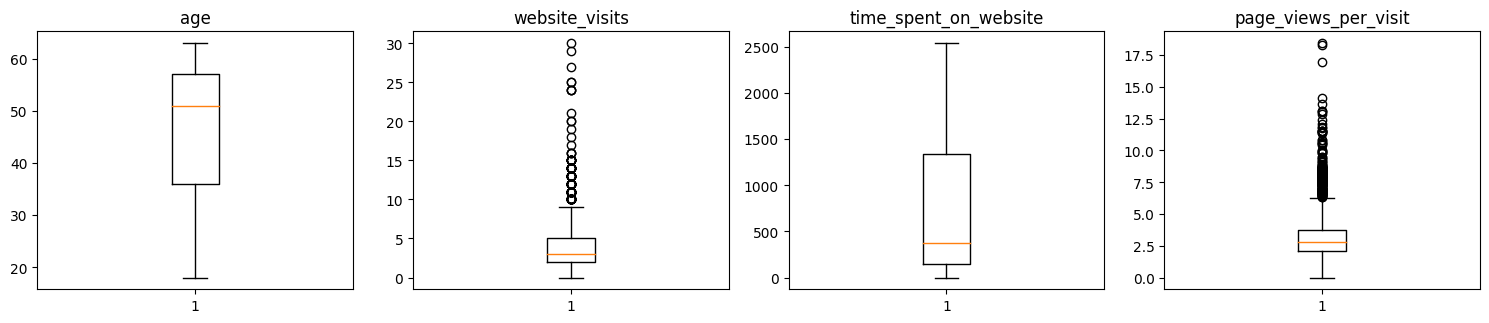

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observsations:**
*  The outliers are in **website_visits and page_views_per_visit**.
* **website_visits and page_views_per_visit** have the lowest distribution, whilst **age and time_spent_on_website** have broader distributions with age median being higher.

In [ ]:
x = data.drop(["status"], axis=1)
y = data['status'] # Complete the code to define the dependent (target) variable

x = pd.get_dummies(x, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

In [ ]:
x

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,0,1,1,0,0,0,1,1,0,1,0,0
1,56,2,83,0.32000,0,0,0,0,1,0,1,0,0,0,1,0
2,52,3,330,0.07400,0,0,1,0,1,0,1,0,0,1,0,0
3,53,4,464,2.05700,0,1,1,0,0,0,1,0,0,0,0,0
4,23,4,600,16.91400,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.17000,0,1,0,0,1,1,0,0,0,0,1,0
4608,55,8,2327,5.39300,0,0,0,0,1,0,0,0,0,0,0,0
4609,58,2,212,2.69200,0,0,1,0,0,0,0,0,0,0,0,0
4610,57,1,154,3.87900,0,0,0,0,1,0,1,1,0,0,0,0


**Observations:**
* We have **4612 rows and 16 columns** after converting the categorical columns to numerical values.

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
0   0.70415
1   0.29585
Name: status, dtype: float64
Percentage of classes in test set:
0   0.69509
1   0.30491
Name: status, dtype: float64


**Observations:**
*  There are **3228 rows in the training set** and **1384 rows in the test set**.
*   Both Training and test set have at status=0: **(~70%)** and status=1 **(~30%)**.

## Building a Decision Tree model

In [ ]:
# adjusted R^2 score
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

In [ ]:
# Mean absolute percentage error
def mape_score(targets, predictions):
    return np.mean(np.abs(targets-predictions)/targets)*100

In [ ]:
#model performance
def model_perfomance_classification(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)                            # for calculating R^2
    adjr2 = adj_r2_score(predictors, target, pred)          # for adjusted R^2
    rmse = np.sqrt(mean_squared_error(target, pred))        # for calcuylating root mean squared error
    mae = mean_absolute_error(target, pred)                 # for calculating mean absolute error
    mape = mape_score(target, pred)                        #for calculating mean absolute percentage error

    df_perf = pd.DataFrame(

            {  'RMSE': rmse,
                'MAE': mae,
                'R-squared': r2,
                'Adj. R-squared':adjr2,
               'MAPE': mape
            }, index = [0]
    )
    return df_perf

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state = 1, max_depth=3)

d_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Model Performance on the train data, i.e., prediction
y_pred_train2 = model_perfomance_classification(d_tree, x_train, y_train)

y_pred_train2

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.43185,0.18649,0.10479,0.10032,inf


**Observations:**
*   The **R-squared** is small, **Adj. R-squared** small as well, preferably we want this to be higher and close to one.
* The **MAE and MAPE** are very large with the **MAPE** being infinity.


In [ ]:
# Model Performance on the test data, i.e., prediction
d_tree_perf_test = model_perfomance_classification(d_tree, x_test, y_test)

d_tree_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.43923,0.19292,0.08975,0.07910,inf


**Observations:**
*   The **R-squared** is has decresed, **Adj. R-squared** decreased as well, preferably we want this to be higher and close to one.
* The **MAE and MAPE** are very large with the **MAPE** being infinity.
* Overfitting on training data.
* RMSE has increased.

In [ ]:
from sklearn import tree

In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2273
           1       0.75      0.56      0.64       955

    accuracy                           0.81      3228
   macro avg       0.79      0.74      0.76      3228
weighted avg       0.81      0.81      0.80      3228



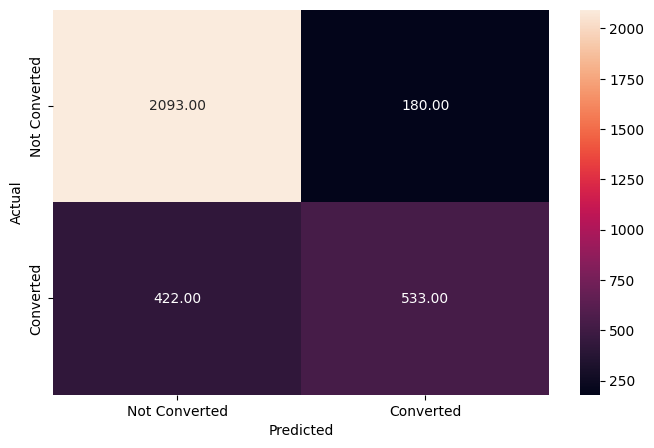

In [ ]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(x_train)

metrics_score(y_train, y_pred_train1)

**Observations:**
*  The Decision Tree has the recall is 56% for the training dataset.
*  The precision on the test data suggests that there's a 75% chance that the model will predict that a person is not going to convert to a paid customer when they actually will and 92% chance that they will be converted when they actually would not.

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       962
           1       0.75      0.55      0.63       422

    accuracy                           0.81      1384
   macro avg       0.79      0.73      0.75      1384
weighted avg       0.80      0.81      0.80      1384



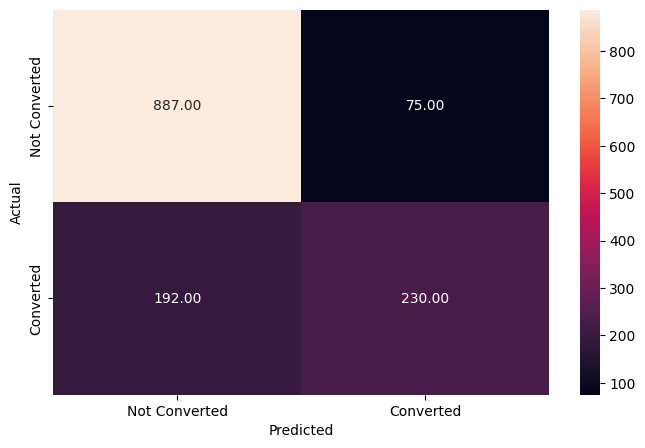

In [ ]:
# Checking performance on the test data
y_pred_test1 = d_tree.predict(x_test)

metrics_score(y_test, y_pred_test1)

**Observations:**
*  The Decision Tree has the recall is 55% for the test dataset, a 1% decrease.
*  The precision on the test data suggests that there's a 75% chance that the model will predict that a person is not going to convert to a paid customer when they actually would and **the company may lose potential leads when they do not see this as they would waste their time and energy on other leads who are not going to convert (92%).**
*  We cannot have both precision and recall high. If you increase precision, it will reduce recall, and vice versa. This is called the precision/recall tradeoff.

**Let's check the coefficients and find which variables are leading to 1 status and which can help to increase the convesion of leads to paid customers.**

<Axes: xlabel='Importance', ylabel='None'>

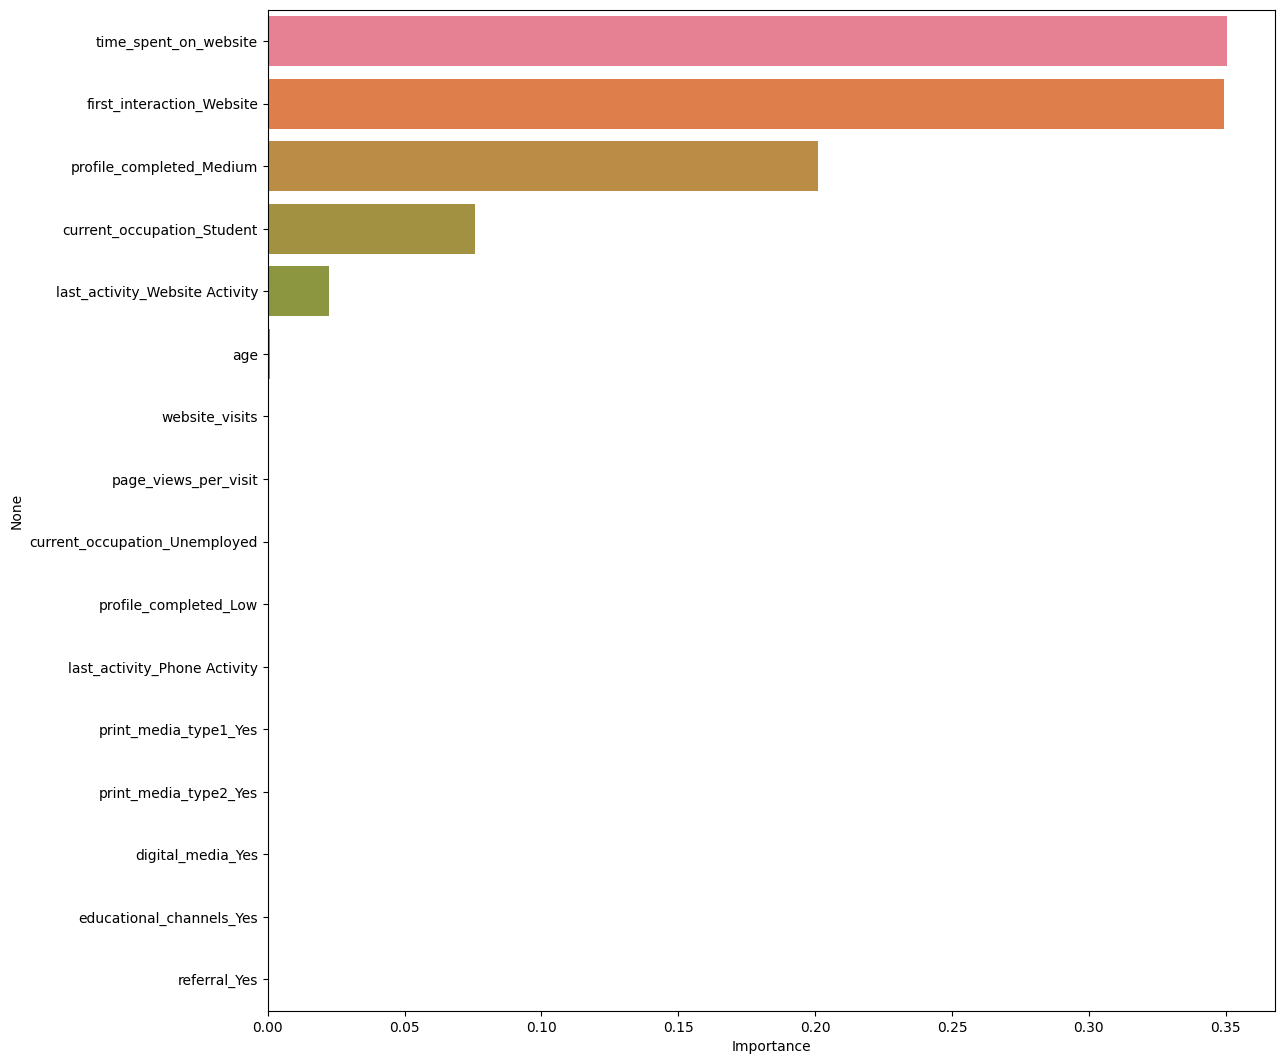

In [ ]:
# Plot the feature importance

importances = d_tree.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index, hue=importance_df.index)

**Observations:**
* According to the Decision Tree, **first_interaction_Website, profile_completed_Medium, current_occupation_Student, last_activity_Website Activity, Age** are the most important features.
* The least important features are **print_media_type2_Yes, , digital_media_Yes, educational_channels_Yes, referral_Yes**

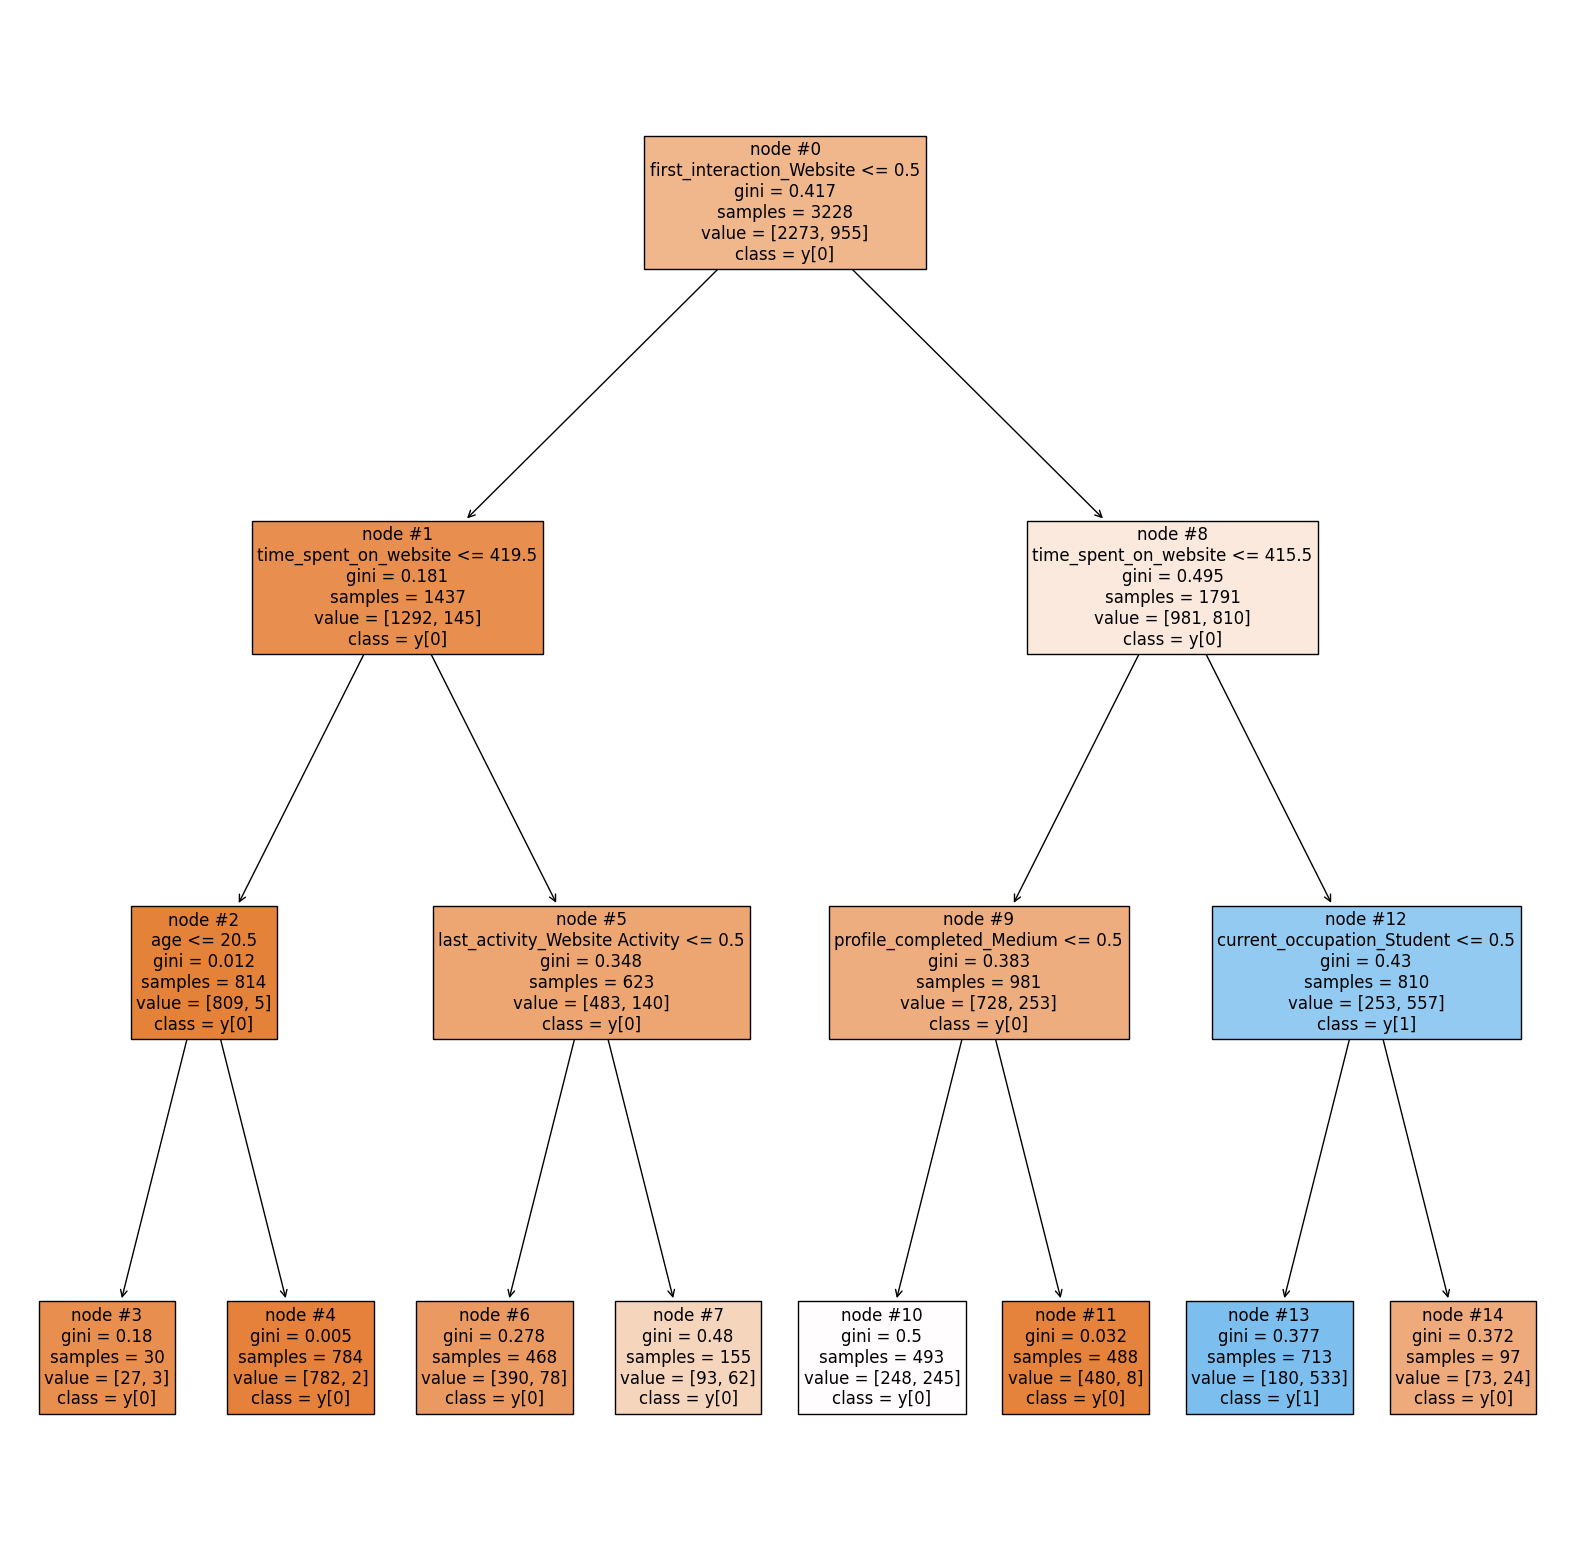

In [ ]:
plt.figure(figsize = (20, 20))
tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = True)
plt.show()

**Note:**

Blue leaves represent the status, i.e., **y[1]** and the orange leaves represent the non-status, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

 **Find the optimal threshold for the model using the Precision-Recall Curve.**

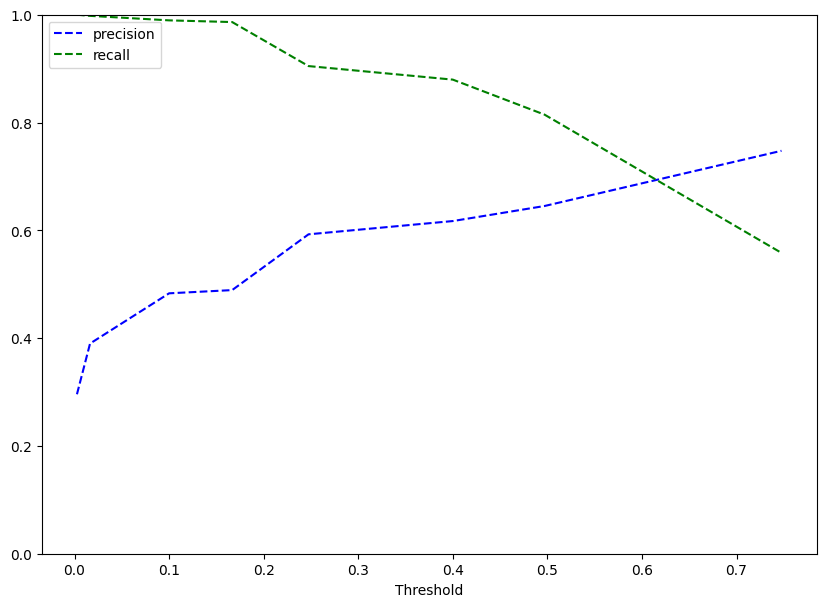

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_dt=d_tree.predict_proba(x_train)

precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train, y_scores_dt[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_dt, precisions_dt[:-1], 'b--', label='precision')
plt.plot(thresholds_dt, recalls_dt[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**NOTE:**

*   We want to choose a threshold that has a high recall while also having a small drop in precision. High recall is necessary, simultaneously we also need to be careful not to lose precision too much. So the threshold value of 0.6 should be sufficient because it has good recall and does not cause a significant drop in precision.
*  We are attempting to maximise recall because that is our metric of interest. Consider the F1 score as the metric of interest then we must find the threshold that provides balanced precision and recall values.

In [ ]:
# Setting the optimal threshold
optimal_threshold = 0.6

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2273
           1       0.75      0.56      0.64       955

    accuracy                           0.81      3228
   macro avg       0.79      0.74      0.76      3228
weighted avg       0.81      0.81      0.80      3228



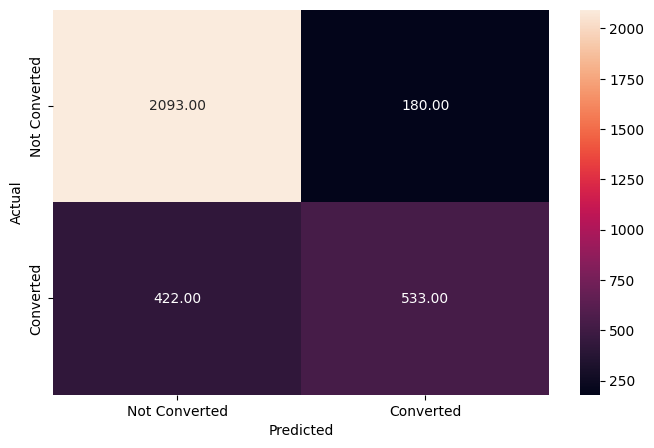

In [ ]:
# creating confusion matrix
y_pred_train = d_tree.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold)

**Observations:**
*  The model now has recall at 56% on training data.
* The model predicts that 75% of leads will not convert when actually they will and 92% that they will be converted when they actually will not. Business may lose a lot of potential leads.
*F1 score slightly increased while Accuarcy is maintaned.

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       962
           1       0.75      0.55      0.63       422

    accuracy                           0.81      1384
   macro avg       0.79      0.73      0.75      1384
weighted avg       0.80      0.81      0.80      1384



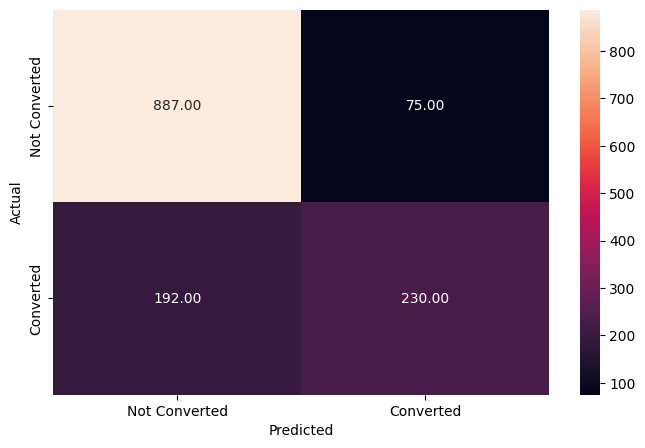

In [ ]:
# creating confusion matrix
y_pred_test = d_tree.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observations:**
*  Recall is 55% on test data.
*  Model predicts that leads will not convert by 75% when they actually will, and 92% that they will be converted when they will be converted.
*  F1 score has increased by 1%.
* Model performing poor.  

## Do we need to prune the tree?

In [ ]:
# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

In [ ]:
# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

In [ ]:
# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

In [ ]:
# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

**Check the performance of the model on the train and test data using the tuned model**

### Checking performance on the training set

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



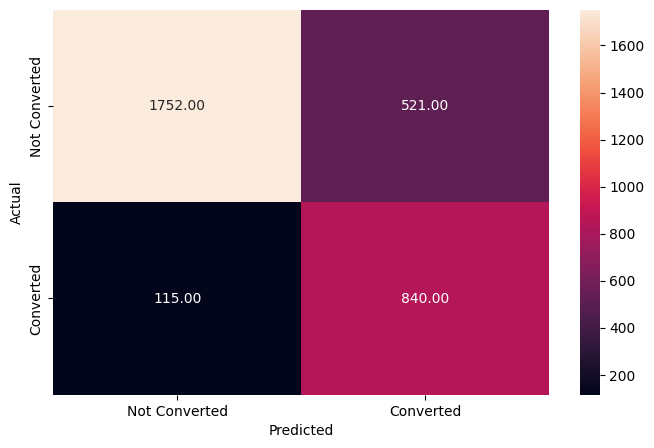

In [ ]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(x_train)
metrics_score(y_train,y_pred_train2)

**Observations:**
*  Recall is 88% on training set which is an increase by 32%.
*  Model predicts that leads will not convert by 62% when they actually will, also decreased by 13% and also predicts that 77% will be converted when they actually will not which is a decrease by 15%.
*  F1 score has increased by 9%, accuracy decreased by 1%.
* Model performing poor.  

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



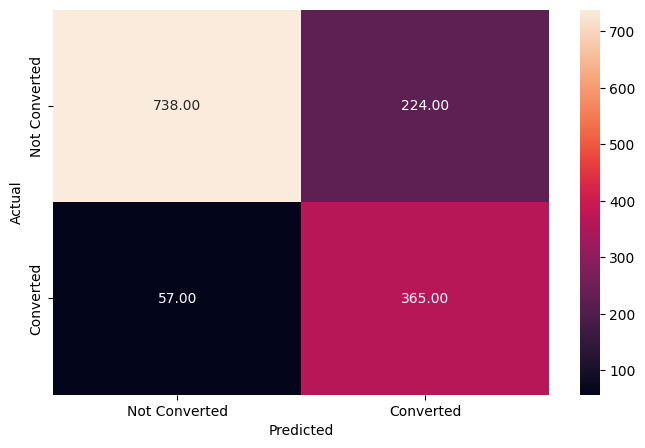

In [ ]:
# Checking performance on the test data
y_pred_test2 = d_tree_tuned.predict(x_test)
metrics_score(y_test,y_pred_test2)

**Observations:**
*  Recall is 86% on test set which is an decrease by 2% from the training set.
*  Model predicts that leads will not convert by 62% when they actually will, which  is still the same.
*  F1 score and accuracy has decreased by 1%.
* Model performing poor.  

### Let's look at the feature importance of the tuned decision tree model.

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


**Observations:**
* The important features are **time_spent_on_website, first_interaction_Website,profile_completed_Medium, age, last_activity_Website Activity.**

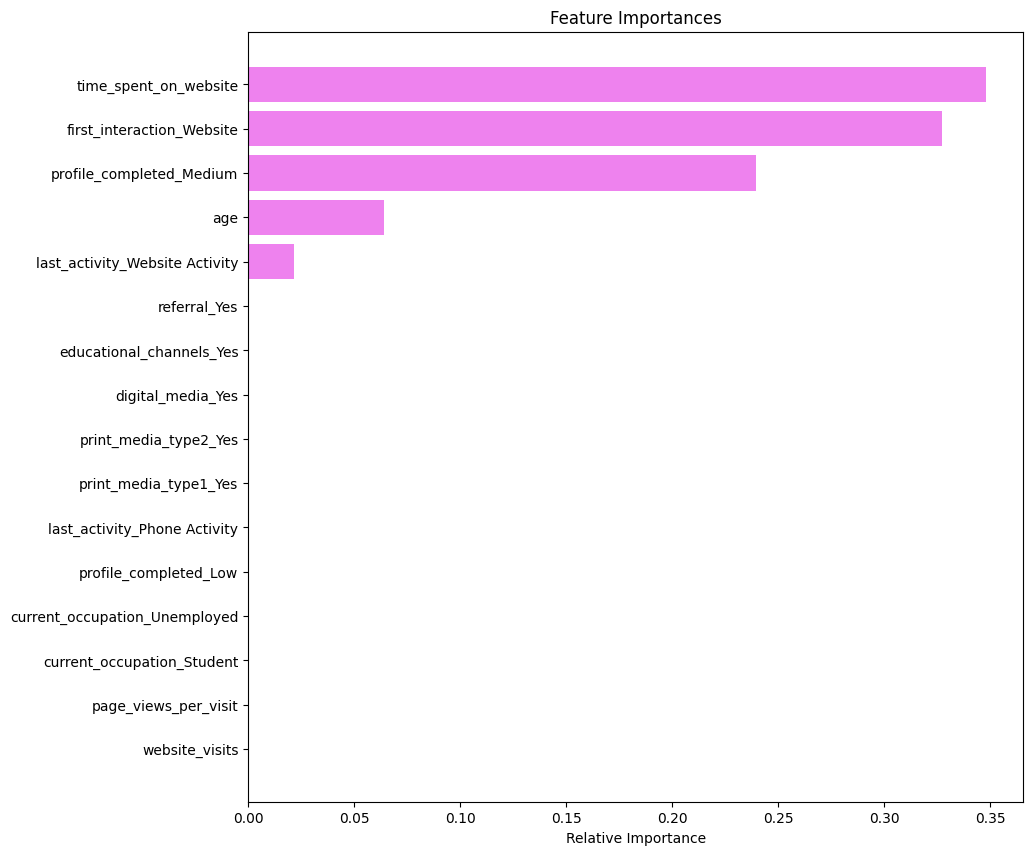

In [ ]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

## Building a Random Forest model

In [ ]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(n_estimators = 100, random_state = 1, max_depth=3)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [ ]:
# Checking performance on the training data
y_pred_train3 = model_perfomance_classification(rf_estimator, x_train, y_train)
y_pred_train3

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.42788,0.18309,0.12114,0.11676,inf


**Observations:**
*   The **R-squared** is small, **Adj. R-squared** small as well, preferably we want this to be higher and close to one.
* The **MAE and MAPE** are large with the **MAPE** being infinity.

In [ ]:
# Model Performance on the test data
rf_estimator_perf_test = model_perfomance_classification(rf_estimator, x_test, y_test)

rf_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.43509,0.18931,0.10680,0.09634,inf


**Observations:**
*   The **R-squared** is has increased, **Adj. R-squared** increased as well, preferably we want this to be higher and close to one.
* The **MAE and MAPE** are very large with the **MAPE** being infinity.
* RMSE has decreased.

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2273
           1       0.86      0.45      0.59       955

    accuracy                           0.82      3228
   macro avg       0.84      0.71      0.74      3228
weighted avg       0.82      0.82      0.80      3228



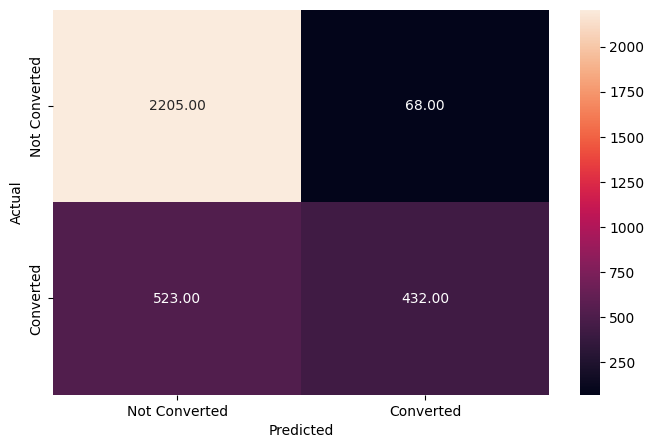

In [ ]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(x_train)
metrics_score(y_train,y_pred_train3)

**Observations:**
*  The Recall is 45% for the training dataset.
* The model predicts that leads will be converted by 97% when they actually would not, this is very high, the business will lose a lot of money for this.

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       962
           1       0.87      0.44      0.59       422

    accuracy                           0.81      1384
   macro avg       0.84      0.71      0.73      1384
weighted avg       0.82      0.81      0.79      1384



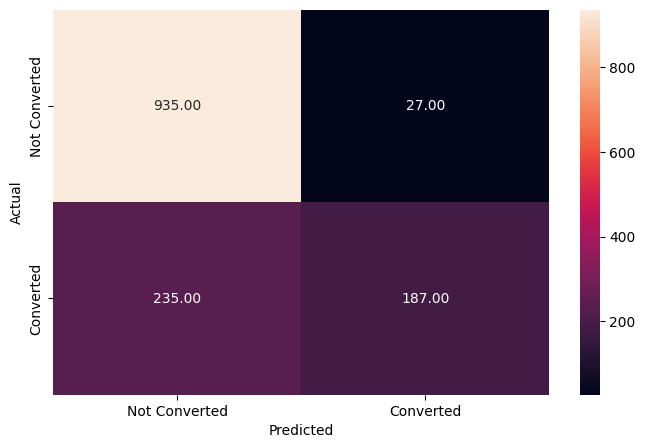

In [ ]:
# Checking performance on the test data
y_pred_test3 = rf_estimator.predict(x_test)
metrics_score(y_test,y_pred_test3)

**Observations:**
*  The Recall is 44% has decreased by 1% in the test dataset.
* The model predicts that leads will be converted by 97% when they actually would not, which i still the same as in the training data.
* We want the Recall to increase.

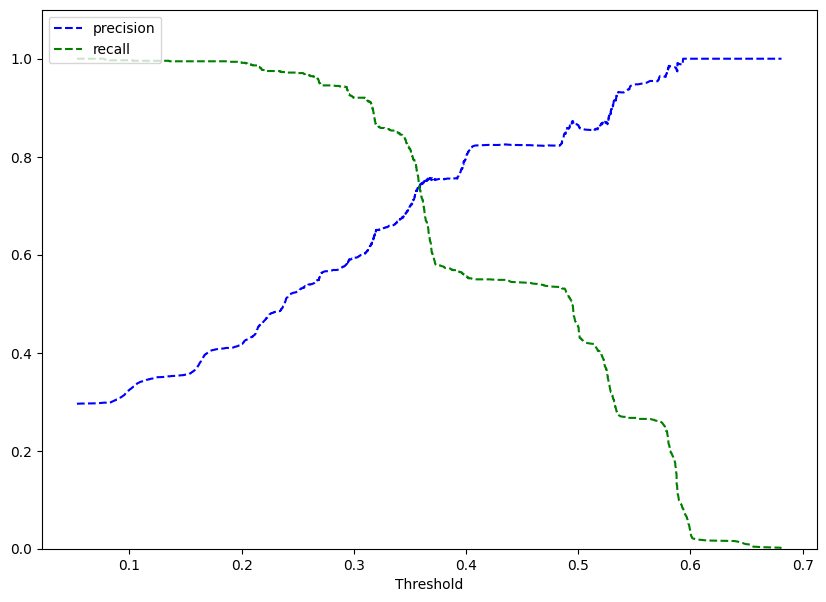

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_rf=rf_estimator.predict_proba(x_train)

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_rf, precisions_rf[:-1], 'b--', label='precision')
plt.plot(thresholds_rf, recalls_rf[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1.1])
plt.show()

In [ ]:
# Setting the optimal threshold
optimal_threshold1 = 0.3

              precision    recall  f1-score   support

           0       0.96      0.74      0.83      2273
           1       0.59      0.92      0.72       955

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



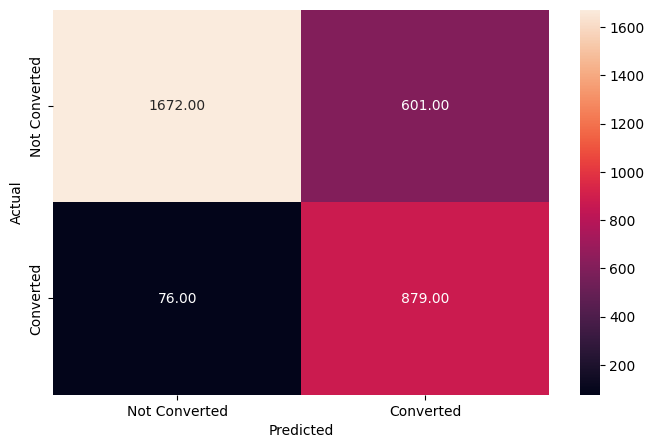

In [ ]:
# creating confusion matrix
yf_pred_train = rf_estimator.predict_proba(x_train)
metrics_score(y_train, yf_pred_train[:,1]>optimal_threshold1)

**Observations:**
*  The Recall has increased by 47% on the training dataset which is 92%.
*  The Model's prediction that the leads will not convert and actually not convert to paid customers is 96% which is good.
* The model also has 74% prediction that the leads will convert to paid customers is 74% when they actually would not, which is really high and will lead to the business losing money and not putting much effort in converting customers.
*  F1 score is 71% and accuarcy at 79% which is quite good.

              precision    recall  f1-score   support

           0       0.96      0.74      0.83       962
           1       0.61      0.92      0.73       422

    accuracy                           0.79      1384
   macro avg       0.78      0.83      0.78      1384
weighted avg       0.85      0.79      0.80      1384



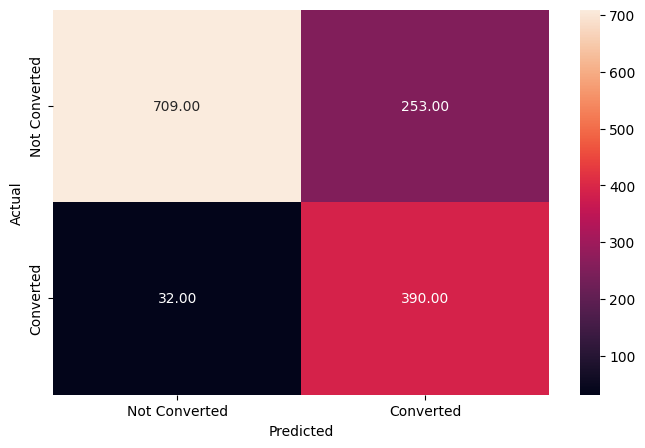

In [ ]:
# creating confusion matrix
yf_pred_test1 = rf_estimator.predict_proba(x_test)
metrics_score(y_test, yf_pred_test1[:,1]>optimal_threshold1)

**Observations:**
*  The Recall on the test set is the same as on the training dataset which is 92%.
*  The Model's prediction that the leads will not convert and actually not convert to paid customers is 96% which is good.
* The model also has 74% prediction that the leads will convert to paid customers is 74% when they actually would not, which is really high and will lead to the business losing money and not putting much effort in converting customers.
*   F1 score is 73%, with 2% increase from the training set and accuarcy at 79% which is quite good.
* Seemingly the model's performance on both the training and test set is almost the same.

**What are some important features based on the Random Forest?**

#### Let's check the feature importance of the Random Forest

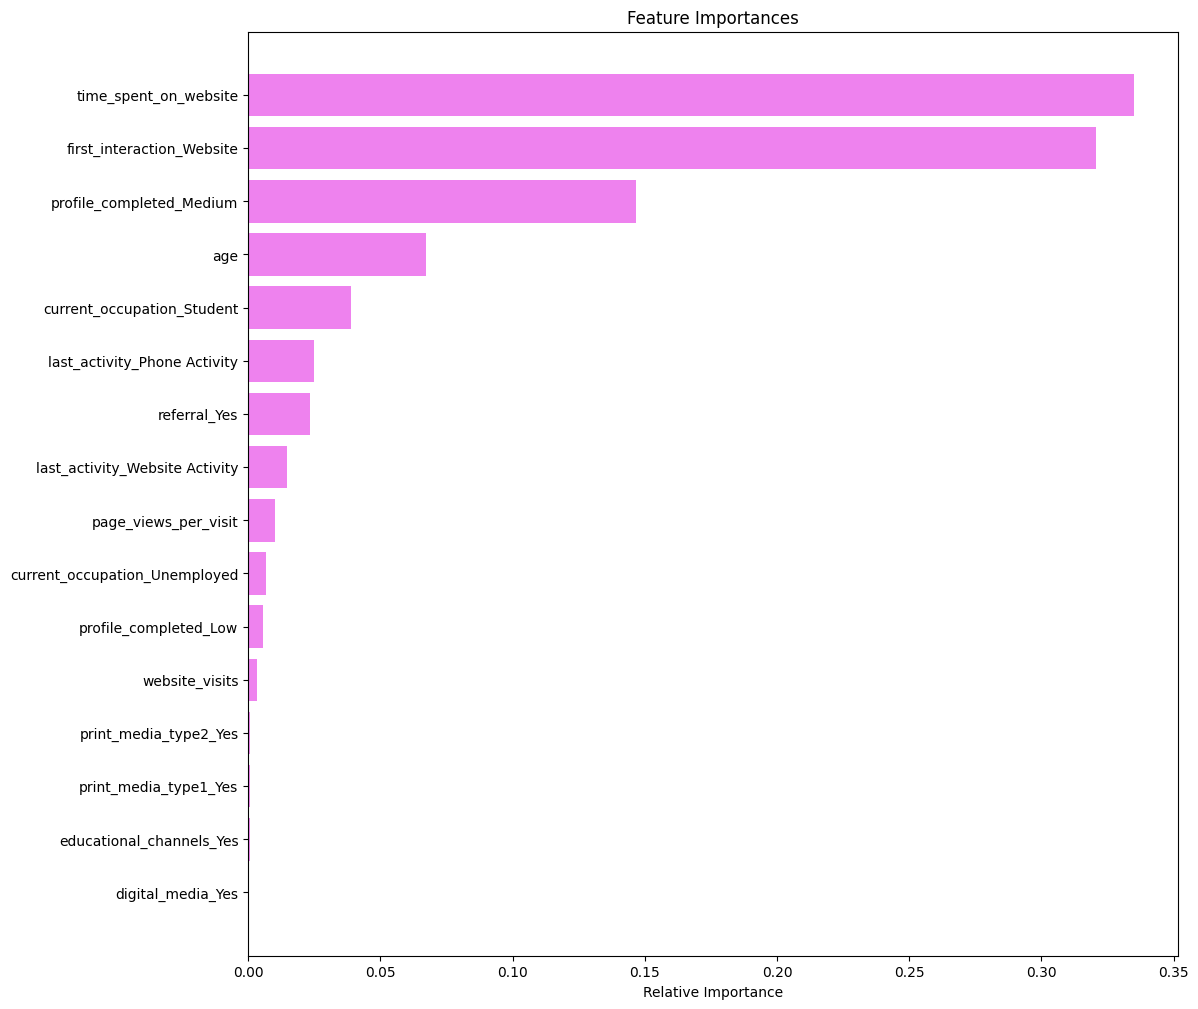

In [ ]:
importances = rf_estimator.feature_importances_

indices = np.argsort(importances)

feature_names = list(x.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
* **time_spent_on_website, first_interaction_Website, profile_completed_Medium** are the most important features followeed by **age, current_occupation_Student.**
* The least important features are **digital_media_Yes, educational_channels_Yes, print_media_type2_yes, print_media_type2_Yes .**

## Do we need to prune the tree?

In [ ]:
from seaborn.axisgrid import Grid

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)


In [ ]:
# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

In [ ]:
# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

In [ ]:
# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)


In [ ]:
# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

In [ ]:
# Model Performance on the training data
rf_estimator_tuned_perf_train = model_perfomance_classification(rf_estimator_tuned, x_train, y_train)

rf_estimator_tuned_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40059,0.16047,0.22970,0.22586,inf


**Observations:**
*  On the training data , the **R-squared** is small, **Adj. R-squared** is small as well, preferably we want this to be higher and close to one.
* The **MAE and MAPE** are very large with the **MAPE** being infinity.
* RMSE has decreased.

In [ ]:
# Model Performance on the test data
rf_estimator_tuned_perf_test = model_perfomance_classification(rf_estimator_tuned, x_test, y_test)

rf_estimator_tuned_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.40677,0.16546,0.21930,0.21016,inf


**Observations:**

*   Compared to the training data, **R-squared** is has decreased, **Adj. R-squared** decreased as well, preferably we want this to be higher and close to one.
* The **MAE increased and MAPE** are very large with the **MAPE** being infinity.
* RMSE has increased.

### Check performance on pruned dataset

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



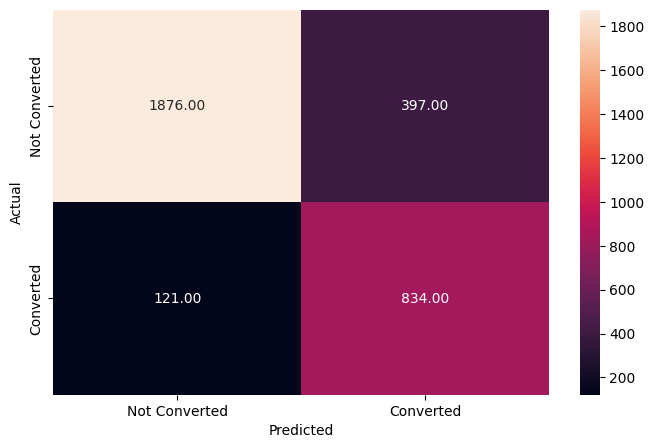

In [ ]:
# Checking performance on the training data
yrt_pred_train2 = rf_estimator_tuned.predict(x_train)
metrics_score(y_train,yrt_pred_train2)

**Observations:**
*  The Recall on the training dataset which is 87%.
*  The Model's prediction that the leads will not convert and actually not convert to paid customers is 94% which is good.
* The model also has 83% prediction that the leads will convert to paid customers when they actually would not.
*   F1 score is 76%, from the training set and accuarcy at 84% which is quite good.

**Observations:**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



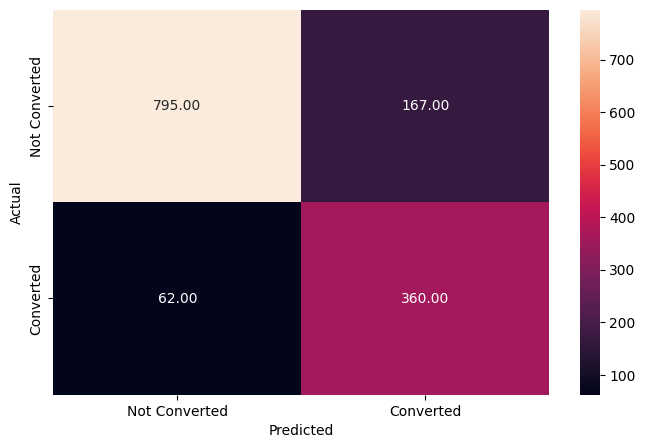

In [ ]:
# Checking performance on the training data
yrt_pred_test2 = rf_estimator_tuned.predict(x_test)
metrics_score(y_test,yrt_pred_test2)

**Observations:**
*  The Recall on the test set is the same as on the test dataset which is 85%, with 2% decrease.
*  The Model's prediction that the leads will not convert and actually not convert to paid customers is 93% a 3% decrease from the training set.
* The model also has 83% prediction that the leads will convert to paid customers when they actually would not, which is really high and will lead to the business losing money and not putting much effort in converting customers.
*   F1 score is 76% incresed by 3% from the training set and accuarcy at 83% which is quite good.
* Seemingly the model's performance on test set is almost the same.

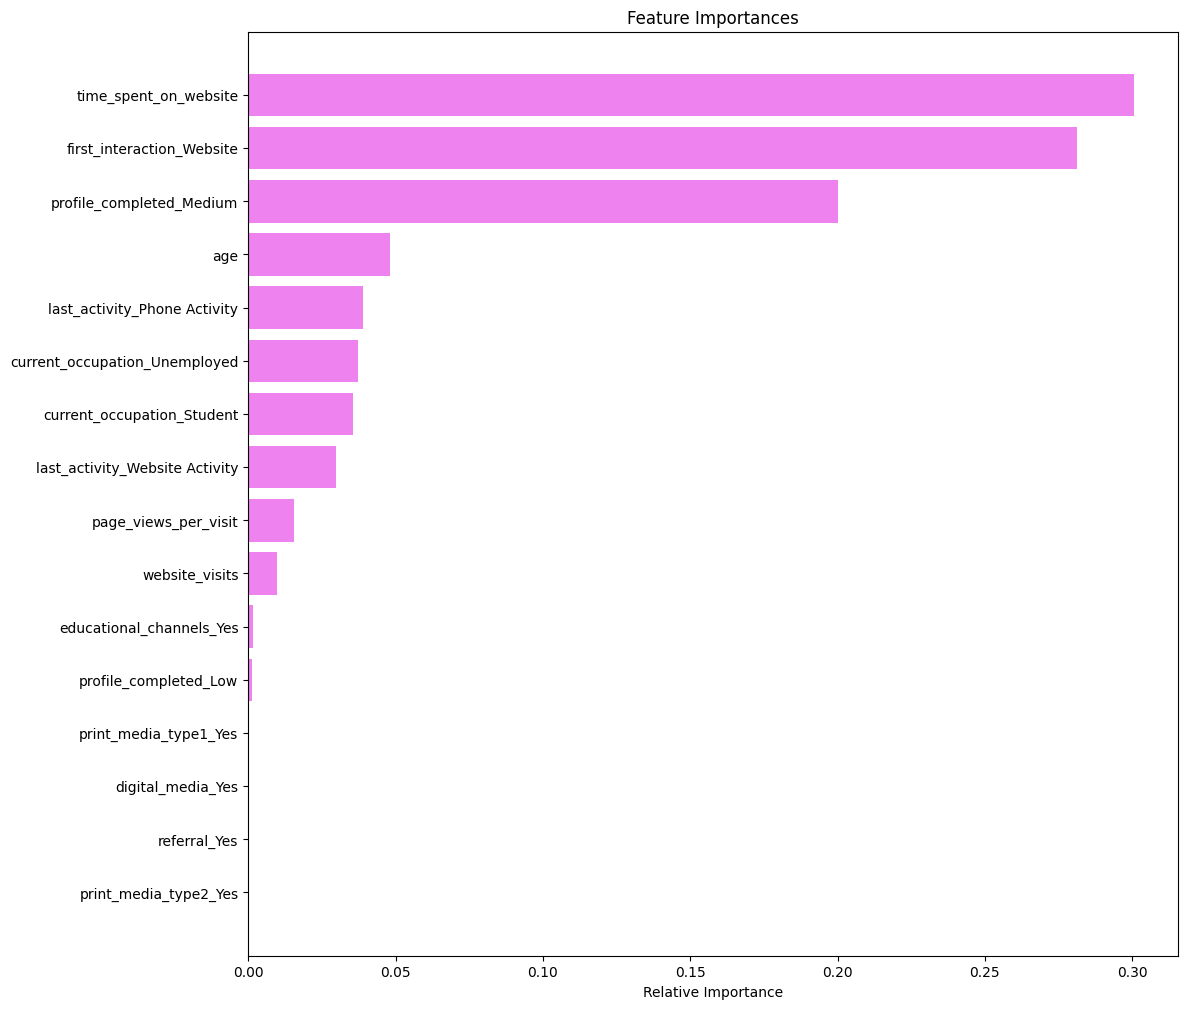

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(x.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**

* Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
* Unlike the decision tree, the random forest gives some **importance to other variables like occupation, page_views_per_visit**, as well. This implies that the **random forest is giving importance to more factors** in comparison to the decision tree.

## Actionable Insights and Recommendations

*  The most important features are  **time_spent_on_website, first_interaction_website, profile_completed, and age** are the top four features that help distinguish between not converted and converted leads.
* Our analysis shows that leads that have been referred are more likely to convert compared to all other advertising platforms.
* Use the website on the first interaction more than the Mobile App.
* Gather as much information as possible for the leads on the profile since leads are more likely to convert when we know more details about them.
*  The business to train the employees for the phone calls so that they can be more convincing to the potential leads.
* There are many leads who spent a lot of time on the website yet they were not converted.The company can have a link or pop-up message after a lead has been on the website or email for some time to ask them if they want to convert to a paid customer, even provide a free trial for a certain amount of time.
*   More advertising is required on all platforms.
* Finally, the Random Forest Regressor can predict the Recall to be 85% on the test data which is a slight decrease on the training data by 2%. The organization can try to distribute resources by spending less on predicting that leads will not convert when they actually will to more on predicting leads will be converted and end up not converted.